# Demonstration of Stock Market Analysis (Bank Datasets) & Univariate Time Series Forecasting with a) Seasonal AutoRegressive Moving Average (SARIMA) and b) Gated Recurrent Unit (GRU) model

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**

**STRUCTURE**

*The first part of this demonstration (**Part A**) is focused on presenting a basic stock market exploratory data analysis which allows the identification and/or interpretation of key/main characteristics of a dataset, by employing data vizualitation techniques in python (Jupyter Notebook) with the use of libraries such as 'seaborn' and 'matplotlib'. The datasets features are based on the 'open','close','high','low' and 'volume' prices obtained from three banks: i) Bank of America (BAC), ii) Wells Fargo (WFC) and iii) Capital One (COF). The Date Range of each of the aforementioned datasets has been selected to be from January 2010 to December 2019. The analysis comprises a) key data feature vizualization plots such as Histogram and Kernel Density Estimation Plots, b) Moving Average and Exponential Weighted Moving Average plots, c) Scatterplots, presenting the relationships/correlations between dataset features, d) price chart in the form of a 'Candlestick' to provide the 'open','close','high' and'low' prices of each stock by indicating the price movement for a selected time index, e) 'Daily Return' (Volatility) plots by determining the time series first difference (price change from a time period to the next) and f) 'Cumulative Return' plots that are related to all examined bank stocks.* 

*The second part of this project (**Part B**) comprises a time series forecasting demonstration based on two predictive models: a) Seasonal Autoregressive Moving Average (SARIMA) and b) Gated Recurrent Unit (GRU). The scope of both case studies is to use the average Weekly Capital One 'Cumulative Return' prices so as to investigate and assess: a) the models predictive capabilities, by fitting/training them with 9 years of past average weekly data from January 2010 to December 2018, so as to predict the average Weekly Capital One 'Cumulative Return' values of the next 52 weeks (January-December 2019) and b) the SARIMA and GRU forecasting capabilities, by fitting/training these models with all dataset samples (increase in training set size) to forecast the average Weekly Capital One 'Cumulative Return' prices for a prediction horizon of 52 weeks (future sequence of observations, January-December 2020). In terms of the SARIMA time series forecasting case study, tests for stationarity are provided (rolling mean,rolling standard deviation,Augmented Dickey Fuller (ADF) test) based on first difference, seasonal difference and seasonal first difference. In addition, seasonal decomposition of the time series is presented, together with autocorrelation and partial autocorrelation plots to to determine the value of the moving average and the autoregressive part of the Seasonal ARIMA model respectively. Regarding the GRU model, there is use of the Keras time series generator to create the training input-target sequence of the deep neural network. The evaluation of the model performance for the case where the prediction horizon is known is based on the comparison of the forecasted values with the test(actual/target)values (Performance Metric --> Root Mean Squared Error). The model training performance is also provided (Training relative error percentage distribution plots and relative error summary statistics).* 


**The Datasets (pandas dataframe) have been obtained from the Pandas datareader package that enables the creation of a dataframe from internet sources, in this case from Yahoo! Finance**



# A) Stock Market Exploratory Analysis

In [110]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader
import datetime

In [111]:
# pandas_datareader.data to get data from the web
import pandas_datareader.data as pdr

In [112]:
# Bank of America (BAC),Wells Fargo (WFC) & Capital One (COF) High, Low, Open, Close, Volume market values: Jan 2010 - Dec 2019
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2019,12,31)
df_BAC =pdr.get_data_yahoo("BAC",start, end)
df_WFC=pdr.get_data_yahoo("WFC",start, end)
df_COF=pdr.get_data_yahoo("COF",start, end)

df_BAC=df_BAC.iloc[:,:5]
df_WFC=df_WFC.iloc[:,:5]
df_COF=df_COF.iloc[:,:5]

In [113]:
# BAC dataset first 3 records
df_BAC.head(3)

,High,Low,Open,Close,Volume
Date,,,,,
2010-01-04,15.750000,15.120000,15.240000,15.690000,180845200.0
2010-01-05,16.209999,15.700000,15.740000,16.200001,209521300.0
2010-01-06,16.540001,16.030001,16.209999,16.389999,205257900.0


In [114]:
# WFC dataset first 3 records
df_WFC.head(3)

,High,Low,Open,Close,Volume
Date,,,,,
2010-01-04,27.48,26.820000,27.020000,27.320000,39335700.0
2010-01-05,28.24,27.240000,27.270000,28.070000,55416000.0
2010-01-06,28.33,27.790001,28.030001,28.110001,33237000.0


In [115]:
# COF dataset first 3 records
df_COF.head(3)

,High,Low,Open,Close,Volume
Date,,,,,
2010-01-04,39.139999,38.549999,38.660000,39.049999,4447400.0
2010-01-05,40.630001,39.619999,39.630001,40.590000,8029400.0
2010-01-06,40.970001,40.200001,40.349998,40.810001,5819000.0


In [116]:
# COF dataset last 3 records
df_COF.tail(3)

,High,Low,Open,Close,Volume
Date,,,,,
2019-12-27,103.739998,102.790001,103.629997,103.000000,840300.0
2019-12-30,103.449997,102.489998,103.389999,102.639999,961100.0
2019-12-31,103.059998,102.379997,102.459999,102.910004,1472800.0


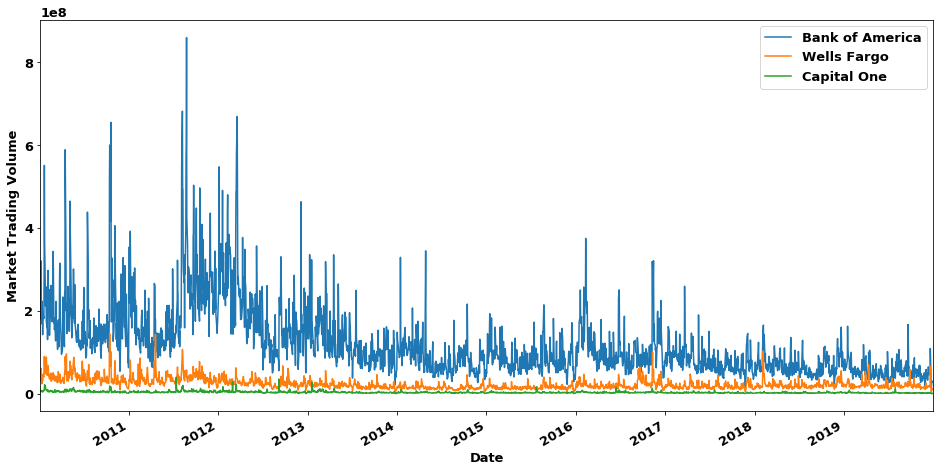

In [117]:
# BAC,WFC,COF market trading volume plot
df_BAC['Volume'].plot(label='Bank of America',figsize=(16,8))
df_WFC['Volume'].plot(label='Wells Fargo')
df_COF['Volume'].plot(label='Capital One')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Market Trading Volume',fontweight='bold')
plt.legend();

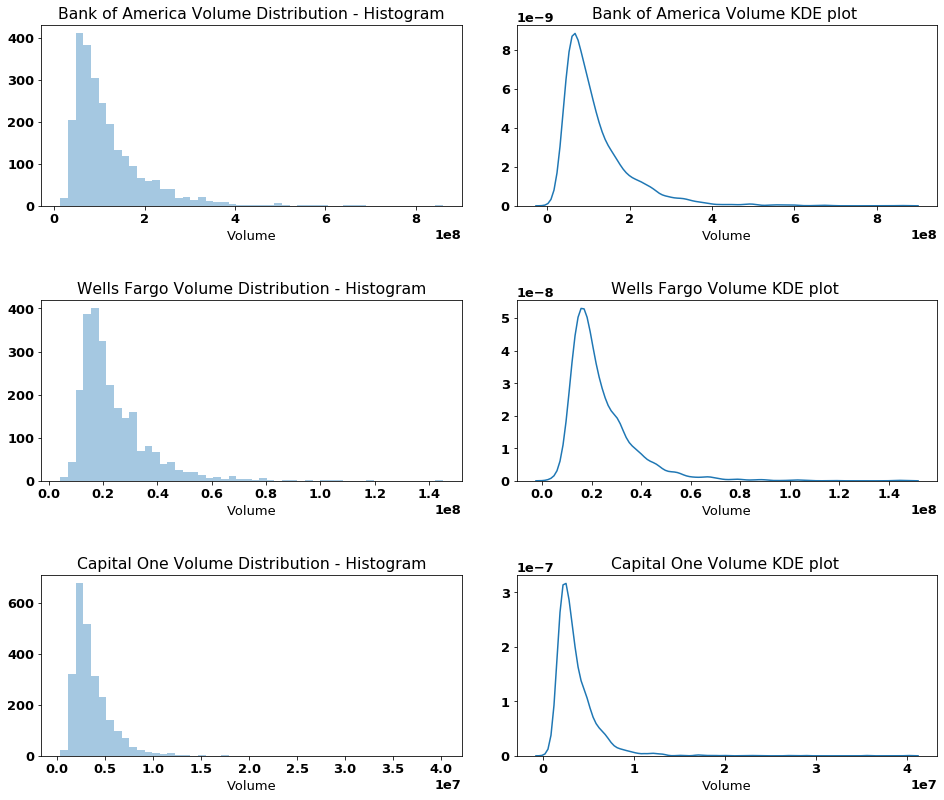

In [118]:
# Bof_America, Wells Fargo & Capital One Market Volume Histogram and Kernel Density Estimation Plots
fig,axs=plt.subplots(3,2,figsize=(14,12))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13

sns.distplot(df_BAC['Volume'],kde=False,bins=50,ax=axs[0,0])
axs[0,0].set_title('Bank of America Volume Distribution - Histogram')


sns.distplot(df_BAC['Volume'],kde=True,hist=False,ax=axs[0,1])
axs[0,1].set_title('Bank of America Volume KDE plot ')



sns.distplot(df_WFC['Volume'],kde=False,bins=50,ax=axs[1,0])
axs[1,0].set_title('Wells Fargo Volume Distribution - Histogram')


sns.distplot(df_WFC['Volume'],kde=True,hist=False,ax=axs[1,1])
axs[1,1].set_title('Wells Fargo Volume KDE plot ')

sns.distplot(df_COF['Volume'],kde=False,bins=50,ax=axs[2,0])
axs[2,0].set_title('Capital One Volume Distribution - Histogram')


sns.distplot(df_COF['Volume'],kde=True,hist=False,ax=axs[2,1])
axs[2,1].set_title('Capital One Volume KDE plot ')

for ax in axs.flat:
    
    ax.figure.tight_layout(pad=3);

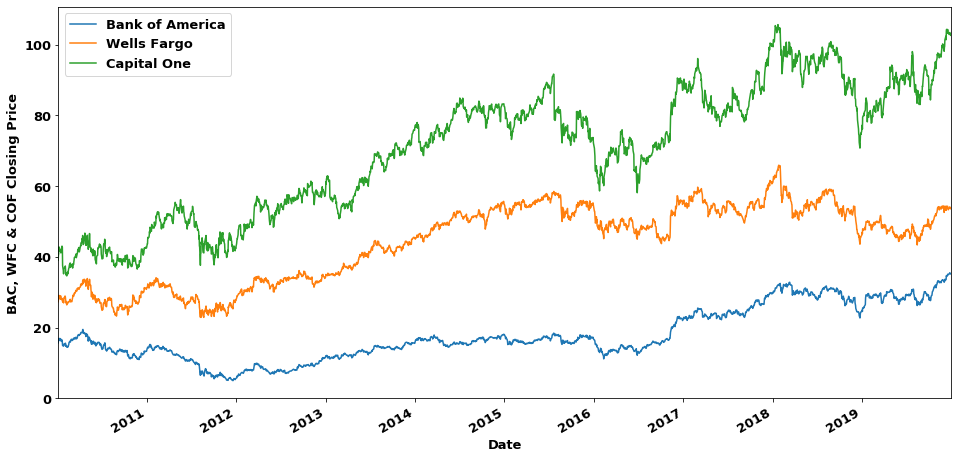

In [119]:
# BAC, WFC & COF Closing Price plots
df_BAC['Close'].plot(label='Bank of America',figsize=(16,8))
df_WFC['Close'].plot(label='Wells Fargo')
df_COF['Close'].plot(label='Capital One')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('BAC, WFC & COF Closing Price',fontweight='bold')
plt.legend();

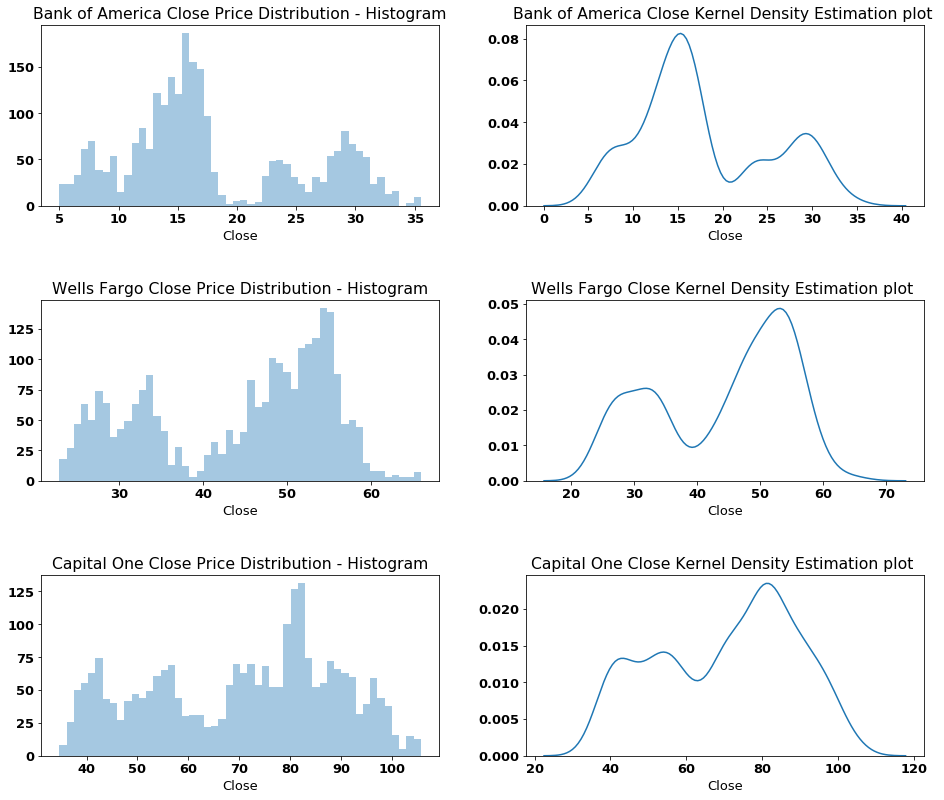

In [120]:
# Bof_America, Wells Fargo & Capital One Close Price Histogram and Kernel Density Estimation Plots
fig,axs=plt.subplots(3,2,figsize=(14,12))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13

sns.distplot(df_BAC['Close'],kde=False,bins=50,ax=axs[0,0])
axs[0,0].set_title('Bank of America Close Price Distribution - Histogram')


sns.distplot(df_BAC['Close'],kde=True,hist=False,ax=axs[0,1])
axs[0,1].set_title('Bank of America Close Kernel Density Estimation plot ')



sns.distplot(df_WFC['Close'],kde=False,bins=50,ax=axs[1,0])
axs[1,0].set_title('Wells Fargo Close Price Distribution - Histogram')


sns.distplot(df_WFC['Close'],kde=True,hist=False,ax=axs[1,1])
axs[1,1].set_title('Wells Fargo Close Kernel Density Estimation plot ')

sns.distplot(df_COF['Close'],kde=False,bins=50,ax=axs[2,0])
axs[2,0].set_title('Capital One Close Price Distribution - Histogram')


sns.distplot(df_COF['Close'],kde=True,hist=False,ax=axs[2,1])
axs[2,1].set_title('Capital One Close Kernel Density Estimation plot ')

for ax in axs.flat:
    
    ax.figure.tight_layout(pad=3);

In [12]:
# 'Close' column rename
df_BAC.rename(columns={'Close':'BAC Close'},inplace=True)
df_WFC.rename(columns={'Close':'WFC Close'},inplace=True)
df_COF.rename(columns={'Close':'COF Close'},inplace=True)

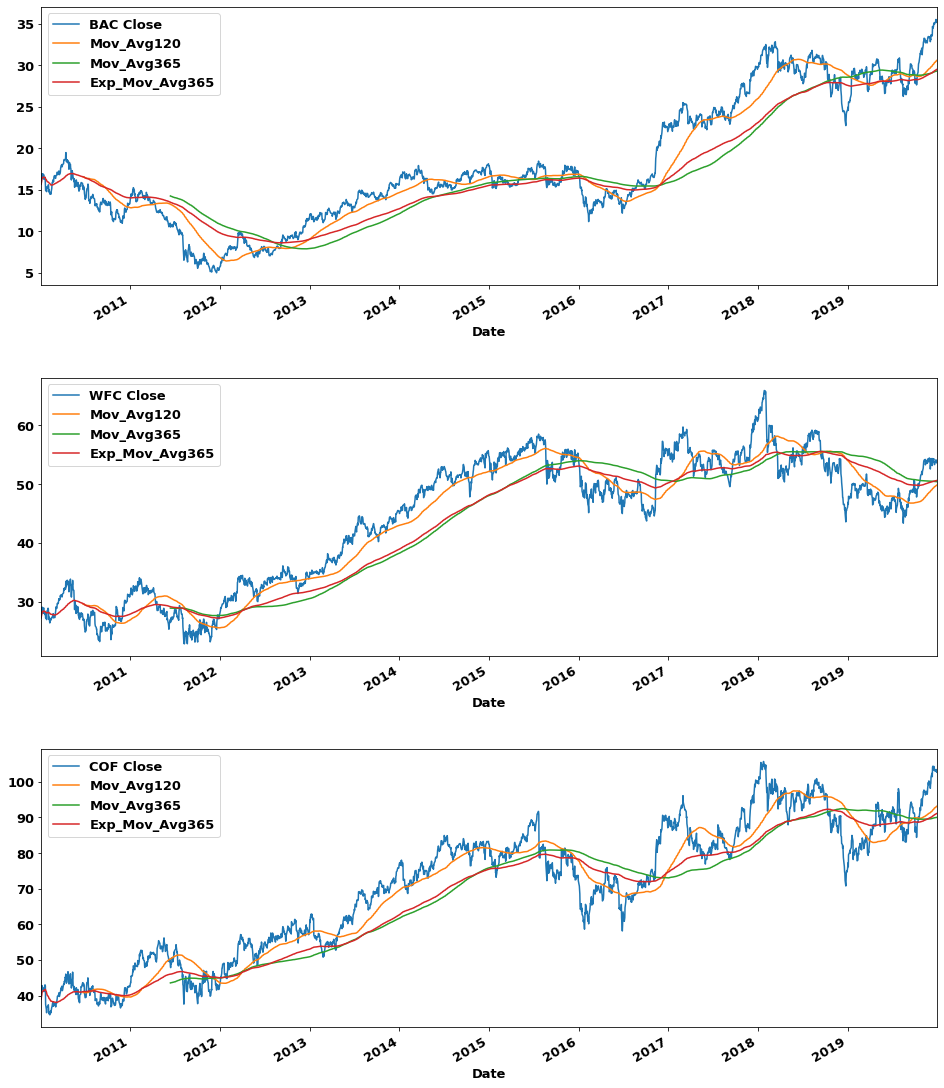

In [13]:
# Moving Average(120,365) and Exp_Weighted_Mov_Average(365) plots
fig,axs=plt.subplots(3,1,figsize=(14,16))
df_BAC['Mov_Avg120'] = df_BAC['BAC Close'].rolling(120).mean()
df_BAC['Mov_Avg365'] = df_BAC['BAC Close'].rolling(365).mean()
df_BAC['Exp_Mov_Avg365'] = df_BAC['BAC Close'].ewm(span=365).mean()
df_BAC[['BAC Close','Mov_Avg120','Mov_Avg365','Exp_Mov_Avg365']].plot(ax=axs[0])

df_WFC['Mov_Avg120'] = df_WFC['WFC Close'].rolling(120).mean()
df_WFC['Mov_Avg365'] = df_WFC['WFC Close'].rolling(365).mean()
df_WFC['Exp_Mov_Avg365'] = df_WFC['WFC Close'].ewm(span=365).mean()
df_WFC[['WFC Close','Mov_Avg120','Mov_Avg365','Exp_Mov_Avg365']].plot(ax=axs[1])

df_COF['Mov_Avg120'] = df_COF['COF Close'].rolling(120).mean()
df_COF['Mov_Avg365'] = df_COF['COF Close'].rolling(365).mean()
df_COF['Exp_Mov_Avg365'] = df_COF['COF Close'].ewm(span=365).mean()
df_COF[['COF Close','Mov_Avg120','Mov_Avg365','Exp_Mov_Avg365']].plot(ax=axs[2])

for ax in axs.flat:
   
    ax.figure.tight_layout(pad=3)
    ax.set_xlabel('Date',fontweight='bold');

In [14]:
# Dataset comprising the 'Close' values
dataset=pd.concat([df_BAC['BAC Close'],df_WFC['WFC Close'] ,df_COF['COF Close']],axis=1)
dataset.head()

,BAC Close,WFC Close,COF Close
Date,,,
2010-01-04,15.690000,27.320000,39.049999
2010-01-05,16.200001,28.070000,40.590000
2010-01-06,16.389999,28.110001,40.810001
2010-01-07,16.930000,29.129999,42.830002
2010-01-08,16.780001,28.860001,42.459999


In [15]:
# BAC, WFC & COF 'Close' feature Correlations 
dataset.corr()

,BAC Close,WFC Close,COF Close
BAC Close,1.000000,0.701231,0.820659
WFC Close,0.701231,1.000000,0.932545
COF Close,0.820659,0.932545,1.000000


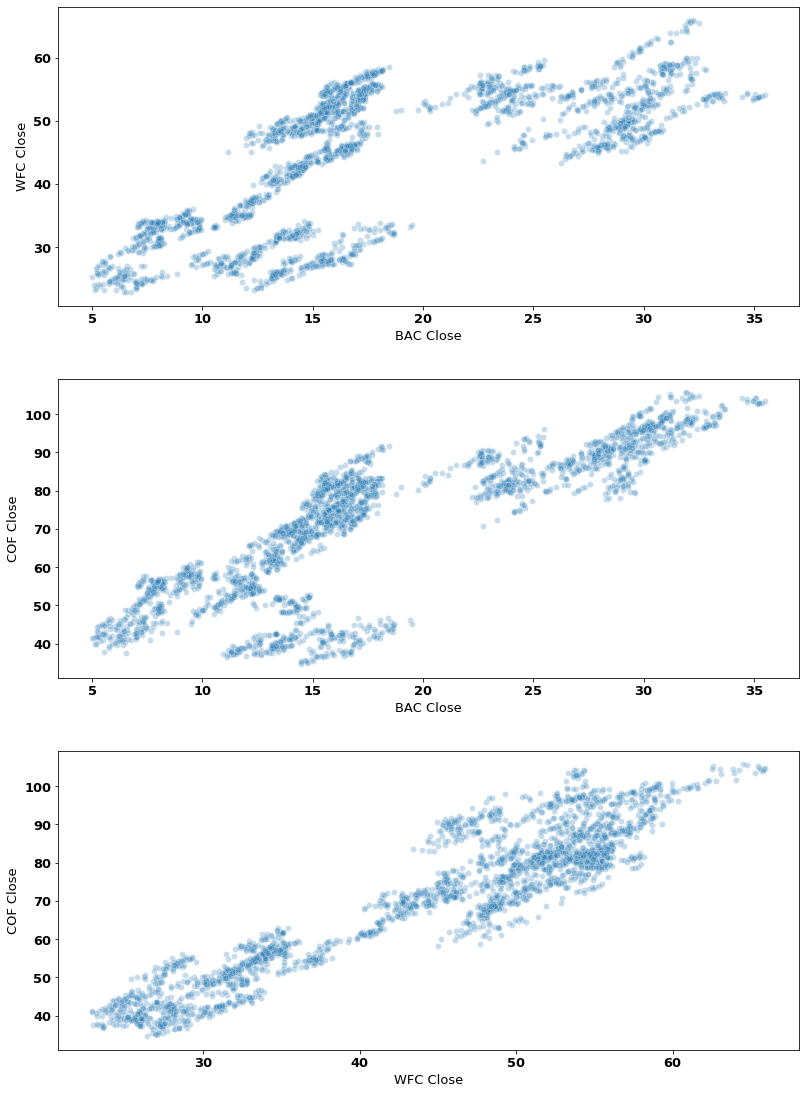

In [16]:
# Scatterplots, for different correlation coefficients, presenting the relationships between each dataset feature. Based on
# the correlation coefficients provided in the previous cell and on the scatterplots presented in this cell,it is obvious 
# that the correlation between WFC and COF 'Close' market values is stronger than the BAC-WFC and BAC-COF.

fig,axs=plt.subplots(3,1,figsize=(12,16))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=12
sns.scatterplot(x='BAC Close',y='WFC Close',data=dataset,palette='Paired',alpha=0.25,ax=axs[0])

sns.scatterplot(x='BAC Close',y='COF Close',data=dataset,palette='Paired',alpha=0.25,ax=axs[1])

sns.scatterplot(x='WFC Close',y='COF Close',data=dataset,palette='Paired',alpha=0.25,ax=axs[2])



for ax in axs.flat:
    
    ax.figure.tight_layout(pad=3)
    

In [17]:
# Importing the necessary packages to create candlestick plot
from matplotlib.dates import (DateFormatter, MonthLocator,DayLocator,FRIDAY,
                              WeekdayLocator, date2num)

from mpl_finance import candlestick_ohlc



C:\Users\geoto\AppData\Local\Continuum\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [18]:
# New dataset comprising the last two months of the original dataset (Nov-Dec 19)
BAC_cndlstick = df_BAC.loc['2019-11':'2020-01'].reset_index()
WFC_cndlstick = df_WFC.loc['2019-11':'2020-01'].reset_index()
COF_cndlstick = df_COF.loc['2019-11':'2020-01'].reset_index()

In [19]:
# Setting up the candlestick inputs
BAC_cndlstick['axis_date'] = BAC_cndlstick['Date'].apply(lambda date: date2num(date))
BAC_c = [tuple(x) for x in BAC_cndlstick[['axis_date', 'BAC Close', 'High', 'Low', 'Open']].values]
WFC_cndlstick['axis_date'] = WFC_cndlstick['Date'].apply(lambda date: date2num(date))
WFC_c = [tuple(x) for x in WFC_cndlstick[['axis_date', 'WFC Close', 'High', 'Low', 'Open']].values]
COF_cndlstick['axis_date'] = COF_cndlstick['Date'].apply(lambda date: date2num(date))
COF_c = [tuple(x) for x in COF_cndlstick[['axis_date', 'COF Close', 'High', 'Low', 'Open']].values]

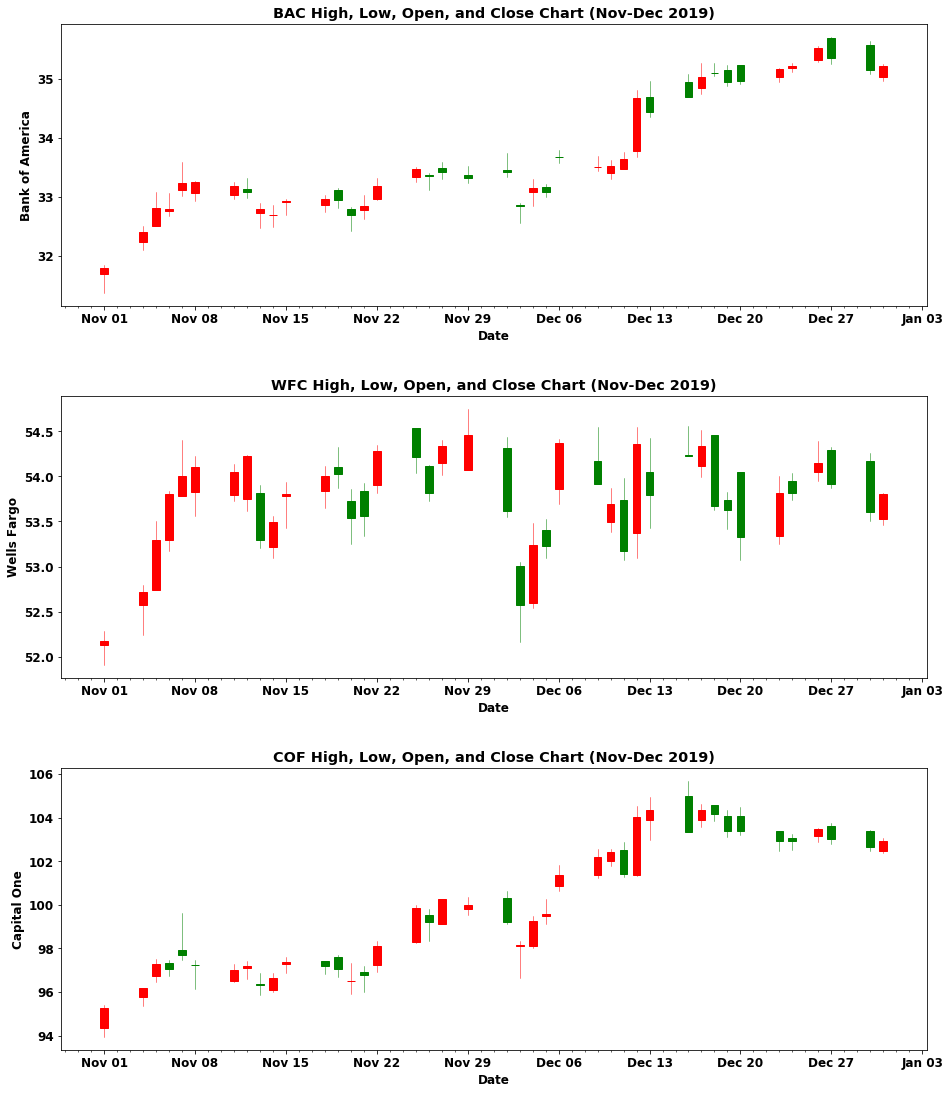

In [20]:
# Candlestick plot presenting all dataset features for Nov-Dec 19 (freq='Weekly'-'Friday')
friday = WeekdayLocator(FRIDAY)       
alldays = DayLocator()              
weekFormatter = DateFormatter( '%b %d') 
dayFormatter = DateFormatter('%d')
fig, axs= plt.subplots(3,1,figsize=(14,16))
fig.subplots_adjust(bottom=0.2)

candlestick_ohlc(axs[0],BAC_c,width=0.6, colorup='g',colordown='r');
axs[0].set_ylabel('Bank of America',fontweight='bold')
axs[0].set_title('BAC High, Low, Open, and Close Chart (Nov-Dec 2019)',fontweight='bold')
candlestick_ohlc(axs[1], WFC_c, width=0.6, colorup='g',colordown='r')
axs[1].set_ylabel('Wells Fargo',fontweight='bold')
axs[1].set_title('WFC High, Low, Open, and Close Chart (Nov-Dec 2019)',fontweight='bold')
candlestick_ohlc(axs[2], COF_c, width=0.6, colorup='g',colordown='r')
axs[2].set_ylabel('Capital One',fontweight='bold')
axs[2].set_title('COF High, Low, Open, and Close Chart (Nov-Dec 2019)',fontweight='bold')
for ax in axs:
    ax.set_xlabel('Date',fontweight='bold')
    ax.xaxis.set_major_locator(friday)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)
    ax.figure.tight_layout(pad=3);

In [21]:
# New column 'Daily Return'- Perc. of first difference between current and previous 'Close' market prices.
df_BAC['Daily_Return']=df_BAC['BAC Close'].pct_change(1)
df_WFC['Daily_Return']=df_WFC['WFC Close'].pct_change(1)
df_COF['Daily_Return']=df_COF['COF Close'].pct_change(1)

In [22]:
# BAC 'Daily Return' first 5 entries
df_BAC['Daily_Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.032505
2010-01-06    0.011728
2010-01-07    0.032947
2010-01-08   -0.008860
Name: Daily_Return, dtype: float64

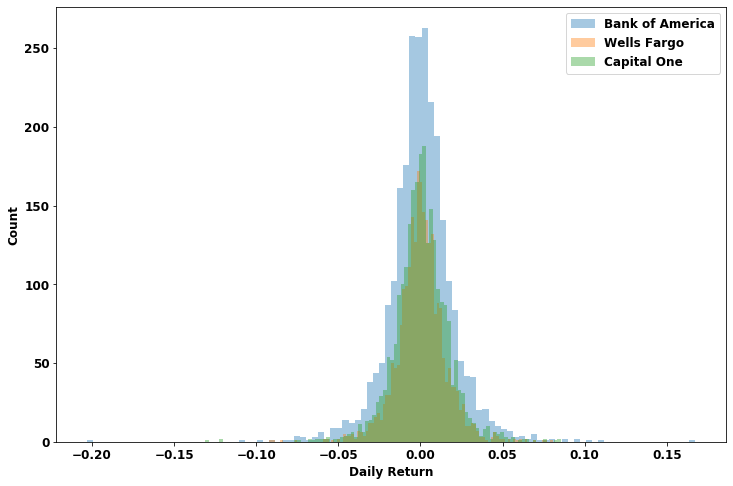

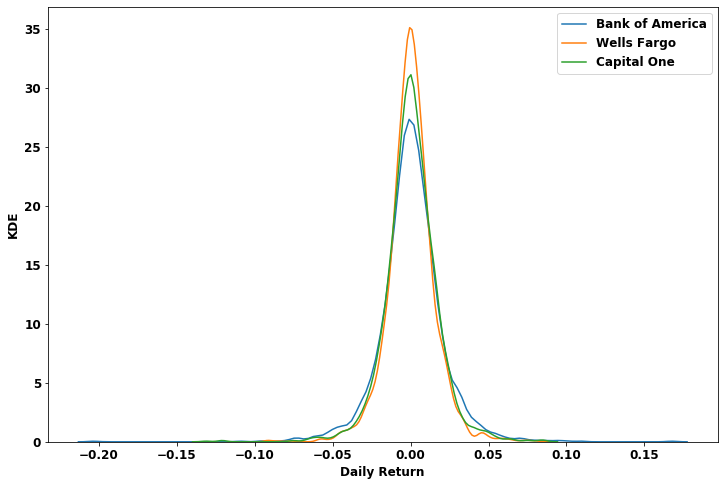

In [23]:
# Bof_America, Wells Fargo & Capital One Daily Return Histogram and Kernel Density Estimation Plots

# By observing the two plots, it can be derived that compared to Wells Fargo and Capital One,Bank of America stock is 
# the one with the highest volatility due to its wide 'Close' price distribution. This means that the closing price does not
# have the stability of the other two stocks due to its high fluctuations (can be either very profitable or loss-making).
# Wells Fargo stock on the other hand, is the most stable when compared to the two other stocks, as it has the highest
# peak centered around zero (kde plot)

plt.figure(figsize=(12,8))
sns.distplot(df_BAC['Daily_Return'],kde=False,bins=100,label='Bank of America')
sns.distplot(df_WFC['Daily_Return'],kde=False,bins=100,label='Wells Fargo')
sns.distplot(df_COF['Daily_Return'],kde=False,bins=100,label='Capital One')
plt.xlabel('Daily Return',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.legend(loc='best')
plt.figure(figsize=(12,8))
sns.distplot(df_BAC['Daily_Return'],kde=True,hist=False,label='Bank of America')
sns.distplot(df_WFC['Daily_Return'],kde=True,hist=False,label='Wells Fargo')
sns.distplot(df_COF['Daily_Return'],kde=True,hist=False,label='Capital One')
plt.xlabel('Daily Return',fontweight='bold')
plt.ylabel('KDE',fontweight='bold')
plt.legend(loc='best');

In [24]:
# New dataset comprising all 'Daily Return' features
daily_rtrn=pd.concat([df_BAC['Daily_Return'],df_WFC['Daily_Return'],df_COF['Daily_Return']],axis=1)
daily_rtrn.columns=['BAC Daily_Return','WFC Daily_Return','COF Daily_Return']

In [25]:
# First 3 entries of the daily_rtrn dataset
daily_rtrn.head(3)

,BAC Daily_Return,WFC Daily_Return,COF Daily_Return
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.032505,0.027452,0.039437
2010-01-06,0.011728,0.001425,0.005420


In [26]:
# Daily return features correlations
daily_rtrn.corr()

,BAC Daily_Return,WFC Daily_Return,COF Daily_Return
BAC Daily_Return,1.000000,0.753545,0.670930
WFC Daily_Return,0.753545,1.000000,0.696972
COF Daily_Return,0.670930,0.696972,1.000000


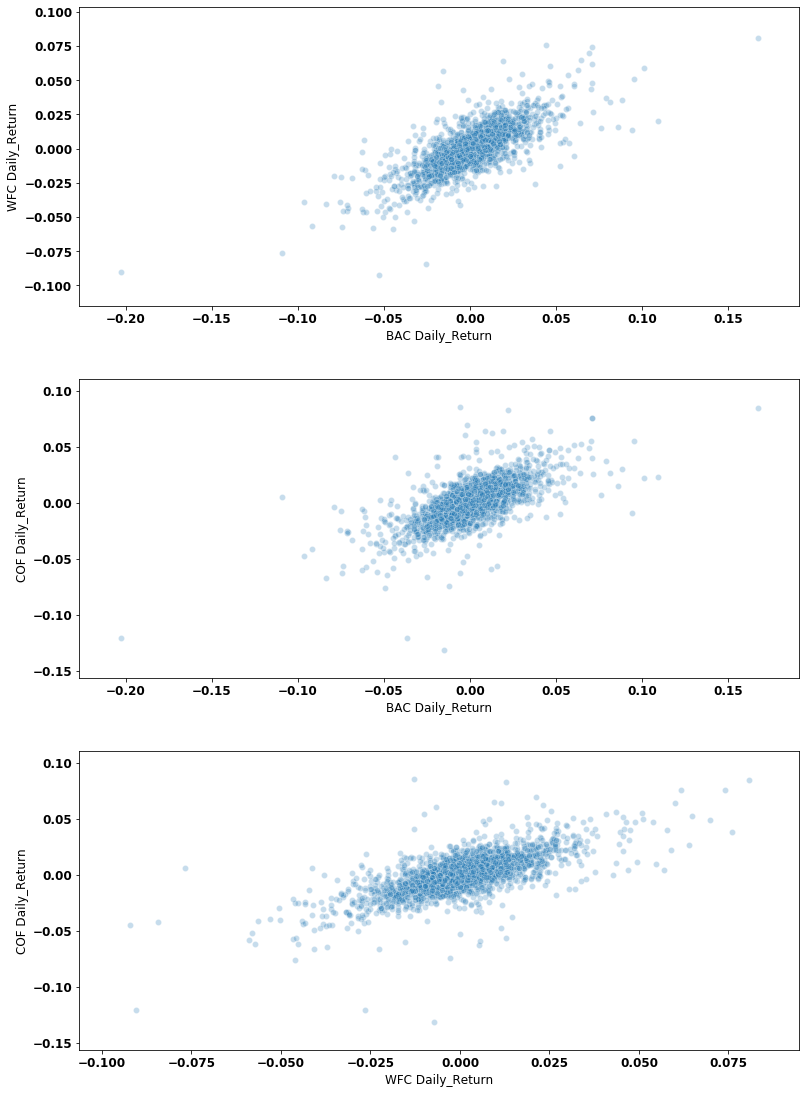

In [27]:
# Scatterplots, for different correlation coefficients, presenting the relationships between each dataset feature. Based on
# the correlation coefficients provided in the previous cell and on the scatterplots presented in this cell,it is obvious 
# that the correlation between BAC and WFC 'Daily_Return' market values is stronger than the BAC-COF and WFC-COF

fig,axs=plt.subplots(3,1,figsize=(12,16))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=12
sns.scatterplot(x='BAC Daily_Return',y='WFC Daily_Return',data=daily_rtrn,palette='Paired',alpha=0.25,ax=axs[0])

sns.scatterplot(x='BAC Daily_Return',y='COF Daily_Return',data=daily_rtrn,palette='Paired',alpha=0.25,ax=axs[1])

sns.scatterplot(x='WFC Daily_Return',y='COF Daily_Return',data=daily_rtrn,palette='Paired',alpha=0.25,ax=axs[2])



for ax in axs.flat:
    
    ax.figure.tight_layout(pad=3)

In [28]:
# New data column comprising the Cumulative Return for each stock
df_BAC['Cum_Rtrn'] = (1 + df_BAC['Daily_Return']).cumprod()
df_WFC['Cum_Rtrn'] = (1 + df_WFC['Daily_Return']).cumprod()
df_COF['Cum_Rtrn'] = (1 + df_COF['Daily_Return']).cumprod()

In [29]:
# BAC cumulative return first 5 entries
df_BAC['Cum_Rtrn'].head()

Date
2010-01-04         NaN
2010-01-05    1.032505
2010-01-06    1.044614
2010-01-07    1.079031
2010-01-08    1.069471
Name: Cum_Rtrn, dtype: float64

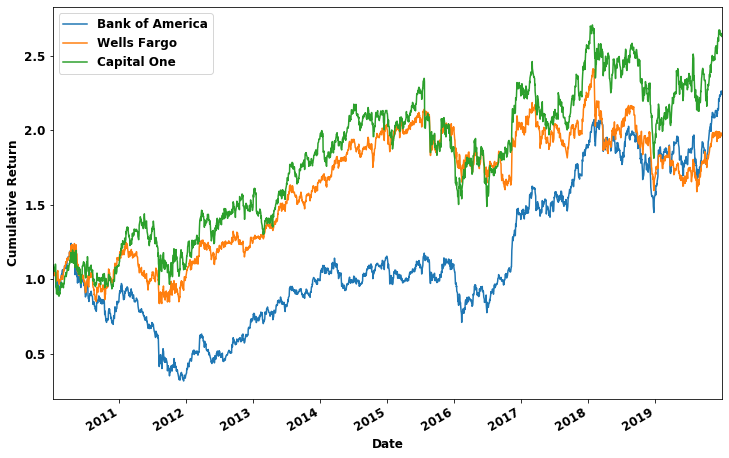

In [30]:
# 'Cum_Rtrn' feature plots
df_BAC['Cum_Rtrn'].plot(label='Bank of America',figsize=(12,8))
df_WFC['Cum_Rtrn'].plot(label='Wells Fargo',figsize=(12,8))
df_COF['Cum_Rtrn'].plot(label='Capital One',figsize=(12,8))
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Cumulative Return',fontweight='bold')
plt.legend()

In [31]:
# Column renaming
df_BAC.rename(columns={'Cum_Rtrn':'BAC Cum_Rtrn'},inplace=True)
df_WFC.rename(columns={'Cum_Rtrn':'WFC Cum_Rtrn'},inplace=True)
df_COF.rename(columns={'Cum_Rtrn':'COF Cum_Rtrn'},inplace=True)

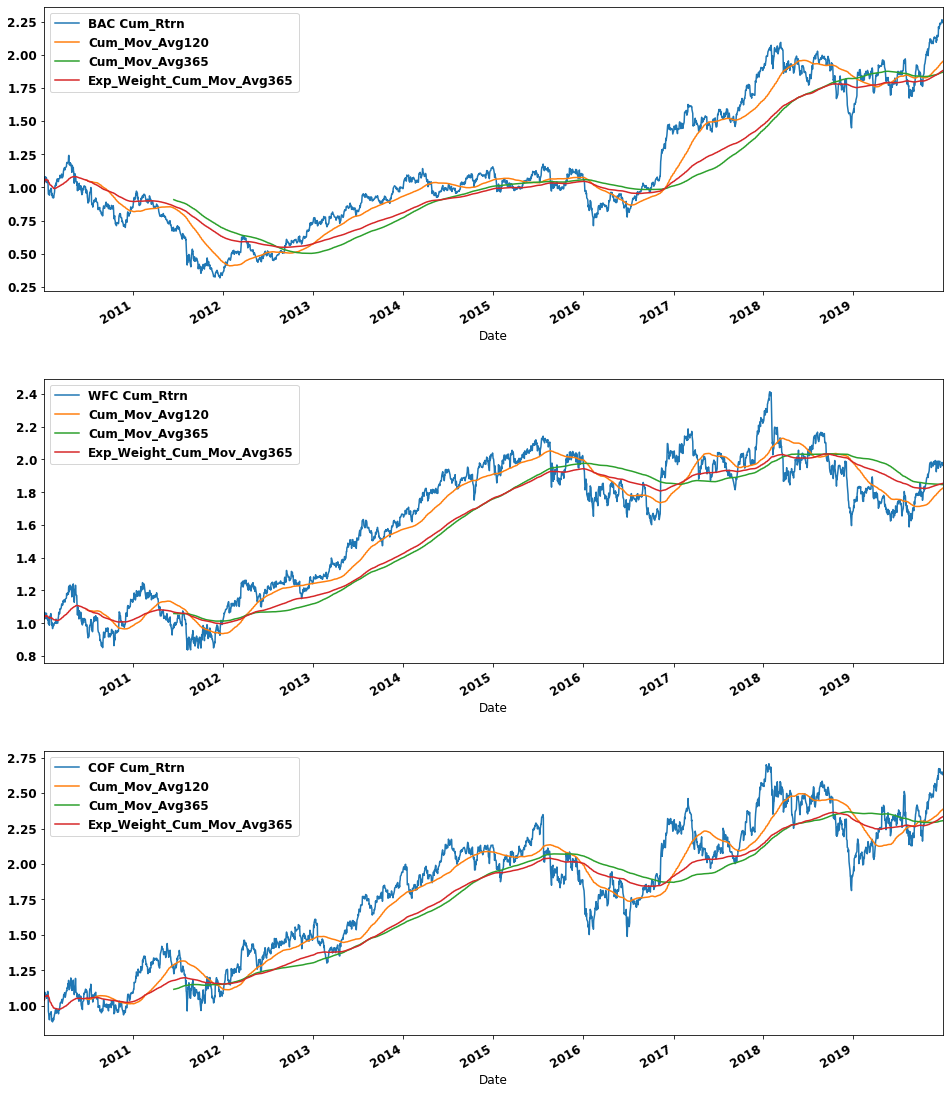

In [32]:
# Cumulative Return Moving Average(120,365) and Exp_Weighted_Mov_Average(365) plots
fig,axs=plt.subplots(3,1,figsize=(14,16))
df_BAC['Cum_Mov_Avg120'] = df_BAC['BAC Cum_Rtrn'].rolling(120).mean()
df_BAC['Cum_Mov_Avg365'] = df_BAC['BAC Cum_Rtrn'].rolling(365).mean()
df_BAC['Exp_Weight_Cum_Mov_Avg365'] = df_BAC['BAC Cum_Rtrn'].ewm(span=365).mean()
df_BAC[['BAC Cum_Rtrn','Cum_Mov_Avg120','Cum_Mov_Avg365','Exp_Weight_Cum_Mov_Avg365']].plot(ax=axs[0])

df_WFC['Cum_Mov_Avg120'] = df_WFC['WFC Cum_Rtrn'].rolling(120).mean()
df_WFC['Cum_Mov_Avg365'] = df_WFC['WFC Cum_Rtrn'].rolling(365).mean()
df_WFC['Exp_Weight_Cum_Mov_Avg365'] = df_WFC['WFC Cum_Rtrn'].ewm(span=365).mean()
df_WFC[['WFC Cum_Rtrn','Cum_Mov_Avg120','Cum_Mov_Avg365','Exp_Weight_Cum_Mov_Avg365']].plot(ax=axs[1])

df_COF['Cum_Mov_Avg120'] = df_COF['COF Cum_Rtrn'].rolling(120).mean()
df_COF['Cum_Mov_Avg365'] = df_COF['COF Cum_Rtrn'].rolling(365).mean()
df_COF['Exp_Weight_Cum_Mov_Avg365'] = df_COF['COF Cum_Rtrn'].ewm(span=365).mean()
df_COF[['COF Cum_Rtrn','Cum_Mov_Avg120','Cum_Mov_Avg365','Exp_Weight_Cum_Mov_Avg365']].plot(ax=axs[2])

for ax in axs.flat:
   
    ax.figure.tight_layout(pad=3);



# B) Time Series Forecasting

In [33]:
# Capital One 'Cum_Rtrn' dataset for demonstration of time series forecasting
data_cof=df_COF['COF Cum_Rtrn']
# dataset first 5 entries (pandas series)
data_cof.head()

Date
2010-01-04         NaN
2010-01-05    1.039437
2010-01-06    1.045070
2010-01-07    1.096799
2010-01-08    1.087324
Name: COF Cum_Rtrn, dtype: float64

In [34]:
# conversion from series to frame
data_cof=data_cof.to_frame()
data_cof.head()

,COF Cum_Rtrn
Date,
2010-01-04,NaN
2010-01-05,1.039437
2010-01-06,1.045070
2010-01-07,1.096799
2010-01-08,1.087324


In [35]:
# Creating a new column'Dates' based on the index dates
data_cof['Dates']=data_cof.index
data_cof.head()

,COF Cum_Rtrn,Dates
Date,,
2010-01-04,NaN,2010-01-04
2010-01-05,1.039437,2010-01-05
2010-01-06,1.045070,2010-01-06
2010-01-07,1.096799,2010-01-07
2010-01-08,1.087324,2010-01-08


In [36]:
# The 'Dates' column date period is converted from 'Business Day' to 'Weekly'
data_cof['Dates'] = data_cof['Dates'].dt.to_period('W')

# Dataset 'COF Cum_Rtrn' column is grouped by 'Dates' column based on the mean weekly 'Cum_Rtrn' values
data_cof=data_cof.groupby('Dates').mean()

data_cof.head()

,COF Cum_Rtrn
Dates,
2010-01-04/2010-01-10,1.067158
2010-01-11/2010-01-17,1.067759
2010-01-18/2010-01-24,1.064405
2010-01-25/2010-01-31,0.929424
2010-02-01/2010-02-07,0.927375


Text(0, 0.5, 'COF Cum_Rtrn')

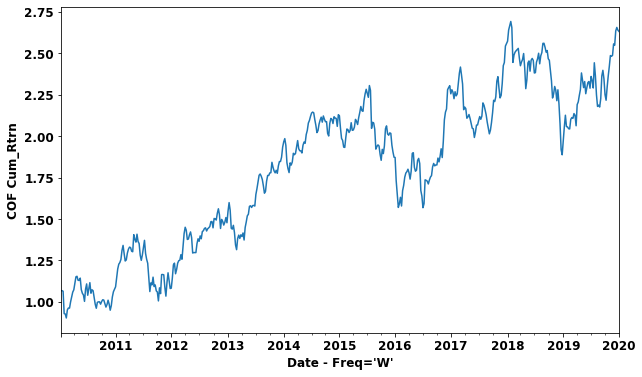

In [37]:
# Mean Weekly 'COF Cum_Rtrn' values plot from 2010 to 2020
plt.figure(figsize=(10,6))
data_cof['COF Cum_Rtrn'].plot()
plt.xlabel("Date - Freq='W'",fontweight='bold')
plt.ylabel("COF Cum_Rtrn",fontweight='bold')

In [38]:
# Dataset consists of 522 entries
data_cof.shape

(522, 1)

# I) SARIMA

## Stationarity Test

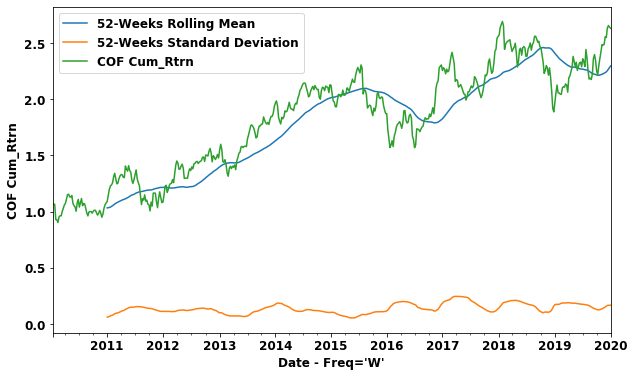

In [39]:
# 52-Weeks rolling mean and stadard deviation.
# As it can be easily observed from the rolling mean plot, there is an increasing trend in the 'COF Cum_Rtrn' values

data_cof['COF Cum_Rtrn'].rolling(52).mean().plot(label='52-Weeks Rolling Mean',figsize=(10,6))
data_cof['COF Cum_Rtrn'].rolling(52).std().plot(label='52-Weeks Standard Deviation')
data_cof['COF Cum_Rtrn'].plot()
plt.xlabel("Date - Freq='W'",fontweight='bold')
plt.ylabel("COF Cum_Rtrn",fontweight='bold')
plt.legend()

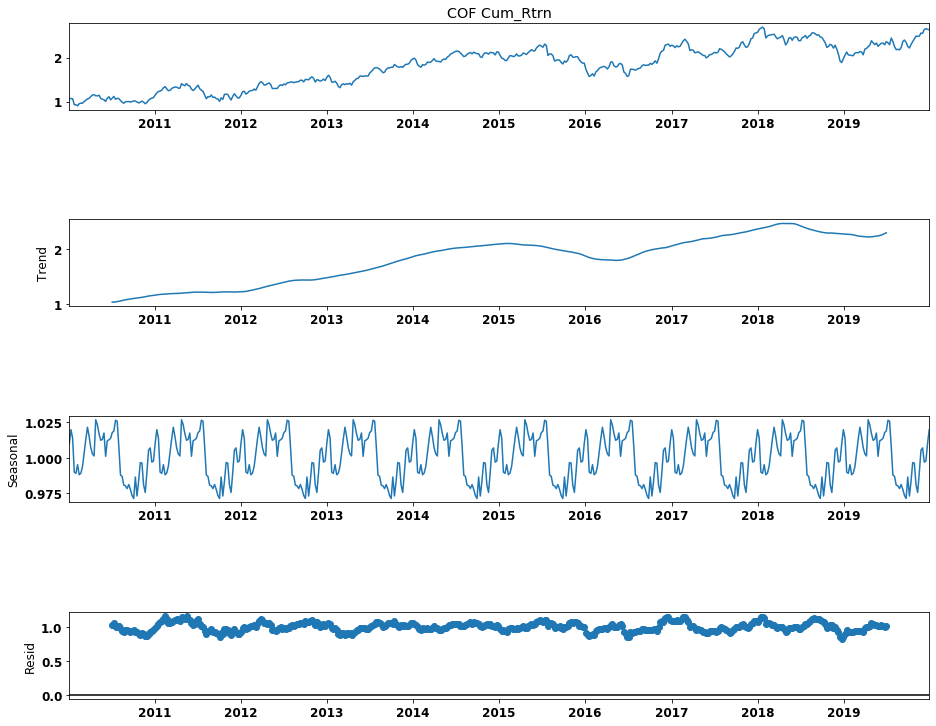

In [40]:
# Importing seasonal_decompose from statsmodels time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition plot to observe the series, trend, seasonality and irregularities
data_cof.index=data_cof.index.to_timestamp()
decomposition=seasonal_decompose(data_cof['COF Cum_Rtrn'],model='multiplicative')
decomp_plot=decomposition.plot()
decomp_plot.set_size_inches(15,12)

In [41]:
# Augmented Dickey–Fuller test to test for stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(t_series):
    outcome=adfuller(t_series)
    print('ADF Stationarity Test')
    label=['Test Statistic','p-val','No. of Lags','No. of Observations']
    
    for x,y in zip(outcome,label):
        print(y+':'+str(x))
    # If p-val less than or equal to 0.05 then the series is considered to be stationary
    # If p-val greater than 0.05, the null hypothesis cannot be rejected (non-stationary series)    
    if outcome[1]<=0.05:
        print('The null hypothesis is rejected-Time series is stationary')
    else:
        print('The null hypothesis cannot be rejected-Time series is non-stationary')

In [42]:
# p-val --> 0.69 > 0.05, thus the null hypothesis cannot be rejected-Time series is non-stationary
test_stationarity(data_cof['COF Cum_Rtrn'])

ADF Stationarity Test
Test Statistic:-1.1537269458008323
p-val:0.6931780019658192
No. of Lags:2
No. of Observations:519
The null hypothesis cannot be rejected-Time series is non-stationary


In [43]:
# Taking the first difference of the 'COF Cum_Rtrn' series based on the change in value from one time period to the next
data_cof['First_Diff']=data_cof['COF Cum_Rtrn']-data_cof['COF Cum_Rtrn'].shift(1)
data_cof['First_Diff'].head()

Dates
2010-01-04         NaN
2010-01-11    0.000602
2010-01-18   -0.003355
2010-01-25   -0.134981
2010-02-01   -0.002049
Freq: W-MON, Name: First_Diff, dtype: float64

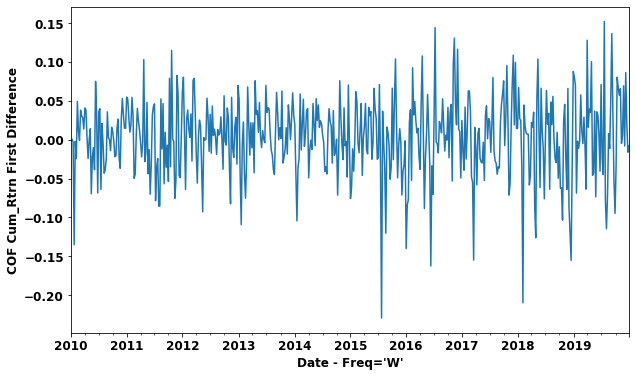

In [44]:
# First Difference plot
data_cof['First_Diff'].plot(figsize=(10,6))
plt.xlabel("Date - Freq='W'",fontweight='bold')
plt.ylabel("COF Cum_Rtrn First Difference",fontweight='bold');

In [45]:
# By performing the ADF test on the 'COF Cum_Rtrn' First Difference, the p-val is << 0.05, therefore
# the null hypothesis is rejected-Time series is stationary
test_stationarity(data_cof['First_Diff'].dropna())

ADF Stationarity Test
Test Statistic:-16.701302729403704
p-val:1.4604547100348922e-29
No. of Lags:1
No. of Observations:519
The null hypothesis is rejected-Time series is stationary


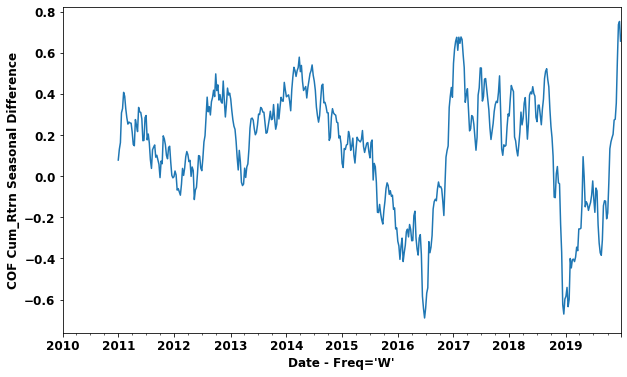

In [46]:
# Another option is to determine the 'COF Cum_Rtrn' seasonal difference  where in this demonstration the second term is 
# determined by shifting the entries by 52 weeks (1 year)
data_cof['Season_Diff']=data_cof['COF Cum_Rtrn']-data_cof['COF Cum_Rtrn'].shift(52)
data_cof['Season_Diff'].plot(figsize=(10,6))
plt.xlabel("Date - Freq='W'",fontweight='bold')
plt.ylabel("COF Cum_Rtrn Seasonal Difference",fontweight='bold');

In [47]:
# By performing the ADF test on the 'COF Cum_Rtrn' Seasonal Difference, the p-val is < 0.05, therefore
# the null hypothesis is rejected-Time series is stationary
test_stationarity(data_cof['Season_Diff'].dropna())


ADF Stationarity Test
Test Statistic:-3.0661010032420792
p-val:0.02916571582914807
No. of Lags:14
No. of Observations:455
The null hypothesis is rejected-Time series is stationary


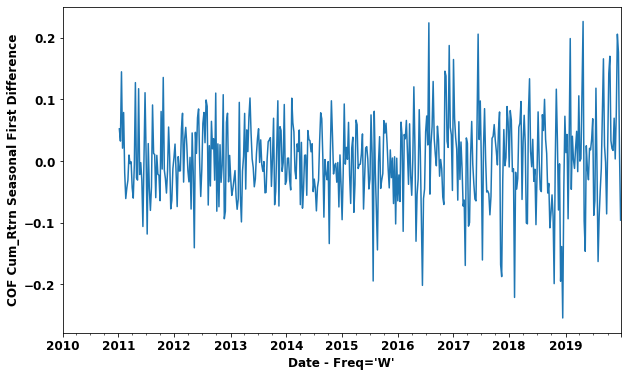

In [48]:
# To further decrease the p-value while keeping the seasonality, the seasonal first difference is determined by substracting
# the first difference with the 52 weeks shifted first difference
data_cof['Season_First_Diff']=data_cof['First_Diff']-data_cof['First_Diff'].shift(52)
# plot of the seasonal first difference
data_cof['Season_First_Diff'].plot(figsize=(10,6))
plt.xlabel("Date - Freq='W'",fontweight='bold')
plt.ylabel("COF Cum_Rtrn Seasonal First Difference",fontweight='bold');

In [49]:
# By performing the ADF test on the 'COF Cum_Rtrn' Seasonal First Difference, the p-val is < 0.05 and less than the
# the seasonal difference p-val, therefore the null hypothesis is rejected-Time series is stationary
test_stationarity(data_cof['Season_First_Diff'].dropna())


ADF Stationarity Test
Test Statistic:-5.260952960140658
p-val:6.593154417475132e-06
No. of Lags:13
No. of Observations:455
The null hypothesis is rejected-Time series is stationary


In [50]:
# Importing the autocorrelation and partial autocorrelaiton functions that are to be used to determine the moving average
# and the autoregressive part of the Seasonal ARIMA model respectively
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

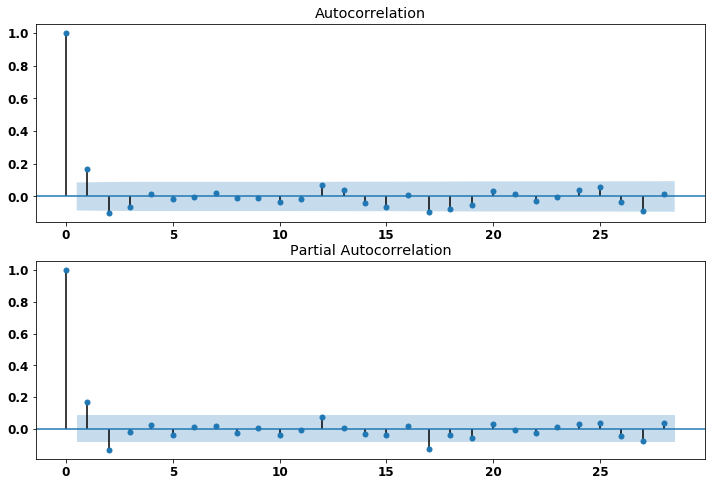

In [51]:
# Correlation and Partial Correlation plots of the 'COF Cum_Rtrn' First Difference
fig = plt.figure(figsize=(12,8))
axes1 = fig.add_subplot(211)
fig=plot_acf(data_cof['First_Diff'].dropna(),ax=axes1)
axes2 = fig.add_subplot(212)
fig=plot_pacf(data_cof['First_Diff'].dropna(),ax=axes2)

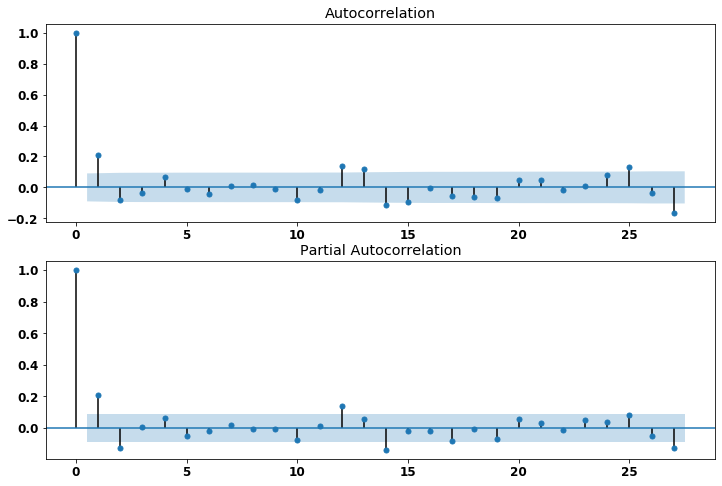

In [52]:
# Correlation and Partial Correlation plots of the 'COF Cum_Rtrn' Seasonal First Difference
fig = plt.figure(figsize=(12,8))
axes1 = fig.add_subplot(211)
fig=plot_acf(data_cof['Season_First_Diff'].dropna(),ax=axes1)
axes2 = fig.add_subplot(212)
fig=plot_pacf(data_cof['Season_First_Diff'].dropna(),ax=axes2)

In [53]:
# Splitting the dataframe into data used a) for SARIMA fitting and b)for test data to compare the model predictions
fit_data=data_cof['COF Cum_Rtrn'][:470]
test_data=data_cof['COF Cum_Rtrn'][470:]

In [54]:
# Test data sample size is 52 (1 year of 'COF Cum_Rtrn'forecast=52 weeks)
test_data.shape

(52,)

In [55]:
# Fitting the SARIMA model--> order=1->autoregressive part,1->moving average,1-> seasonal difference
# seasonal_order is the same on the first 3 terms, and 52 stands for the selected seasonal data samples
import statsmodels.api as sm
sarima=sm.tsa.statespace.SARIMAX(fit_data,order=(1,1,1),seasonal_order=(1,1,1,52))

In [56]:
# Fitting the SARIMA model
sarima_res=sarima.fit()


In [57]:
# First 5 fitted values
sarima_res.fittedvalues[:5]

Dates
2010-01-04    0.000000
2010-01-11    1.067158
2010-01-18    1.067759
2010-01-25    1.064405
2010-02-01    0.929424
Freq: W-MON, dtype: float64

In [58]:
#SARIMA summary
print(sarima_res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       COF Cum_Rtrn   No. Observations:                  470
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                 627.148
Date:                            Mon, 02 Nov 2020   AIC                          -1244.296
Time:                                    01:33:37   BIC                          -1224.131
Sample:                                01-04-2010   HQIC                         -1236.324
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1250      0.193     -0.648      0.517      -0.503       0.253
ma.L1          0.3461      0.185   

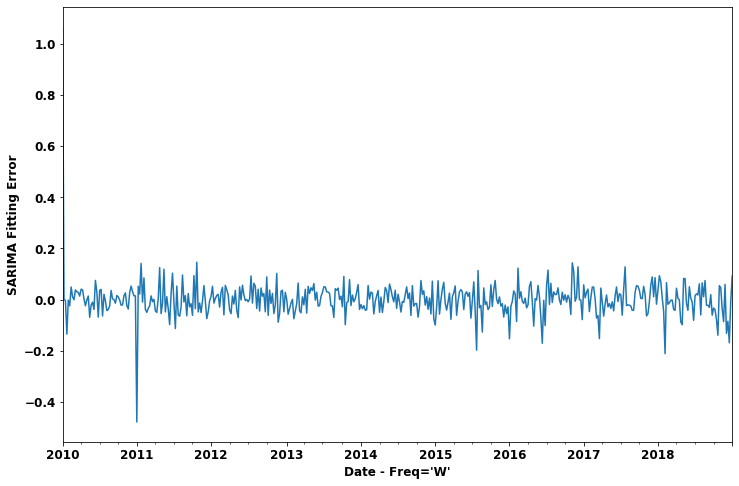

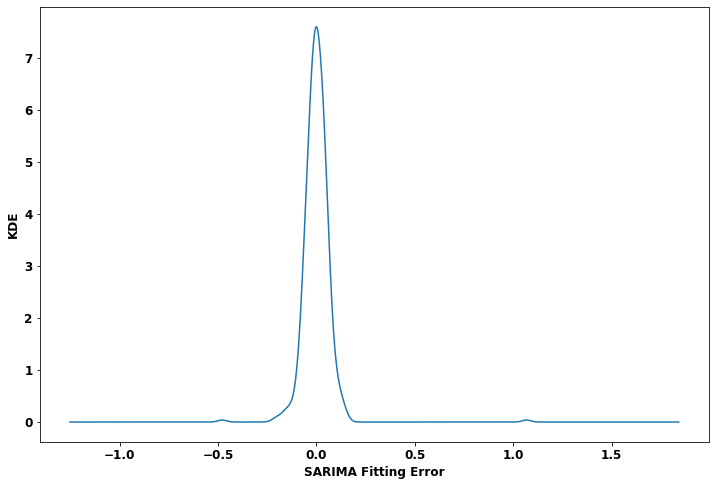

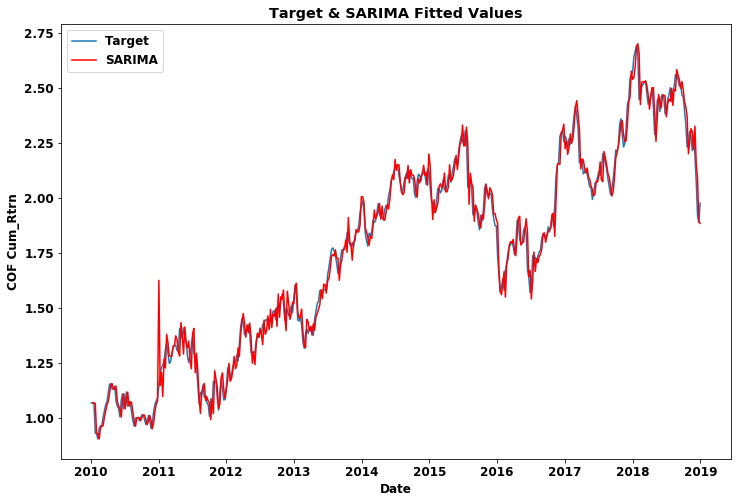

In [59]:
# Error of SARIMA fitted vs. actual values
plt.figure(figsize=(12,8))
sarima_res.resid.plot()
plt.xlabel("Date - Freq='W'",fontweight='bold')
plt.ylabel("SARIMA Fitting Error",fontweight='bold');
# Kernel Density plot of SARIMA Fitting Error
plt.figure(figsize=(12,8))
sarima_res.resid.plot(kind='kde')
plt.ylabel("KDE",fontweight='bold')
plt.xlabel("SARIMA Fitting Error",fontweight='bold');
# Actual & SARIMA Fitted Values
plt.figure(figsize=(12,8))
plt.plot(fit_data,label='Target')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('COF Cum_Rtrn',fontweight='bold')
plt.plot(sarima_res.fittedvalues[1:], color='red',label='SARIMA')
plt.title('Target & SARIMA Fitted Values',fontweight='bold')
plt.legend(loc='best');

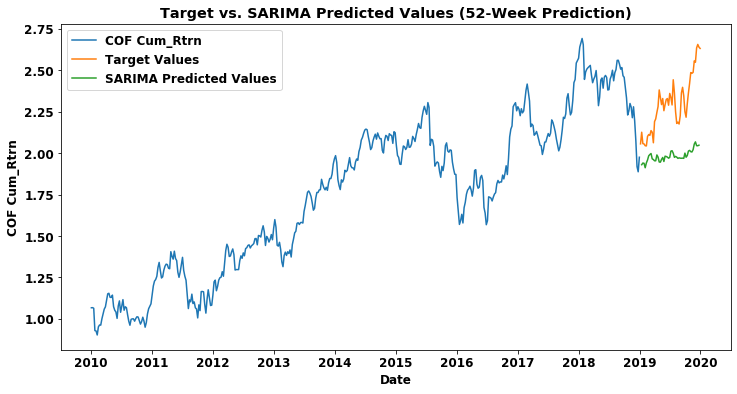

In [60]:
# SARIMA 52 weeks prediction and comparison with test data
SARIMA_Prediction=sarima_res.predict(start=471,end=520,dynamic=True)
plt.figure(figsize=(12,6))
plt.plot(fit_data,label='COF Cum_Rtrn')
plt.plot(test_data,label='Target Values')
plt.plot(SARIMA_Prediction,label='SARIMA Predicted Values')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('COF Cum_Rtrn',fontweight='bold')
plt.title(' Target vs. SARIMA Predicted Values (52-Week Prediction) ',fontweight='bold')
plt.legend();


In [61]:
# First 5 SARIMA predictions
SARIMA_Prediction[:5]

2019-01-14    1.930338
2019-01-21    1.940293
2019-01-28    1.938888
2019-02-04    1.912025
2019-02-11    1.941163
Freq: W-MON, dtype: float64

In [62]:
# To observe the one-year future behavior of the time series (No test data) the SARIMA model can be employed to forecast 
# the future 52 week values of the COF Cum_Rtrn.
sarima_forec=sm.tsa.statespace.SARIMAX(data_cof['COF Cum_Rtrn'],order=(1,1,1),seasonal_order=(1,1,1,52))
sarima_52week_ahead_forec=sarima_forec.fit()

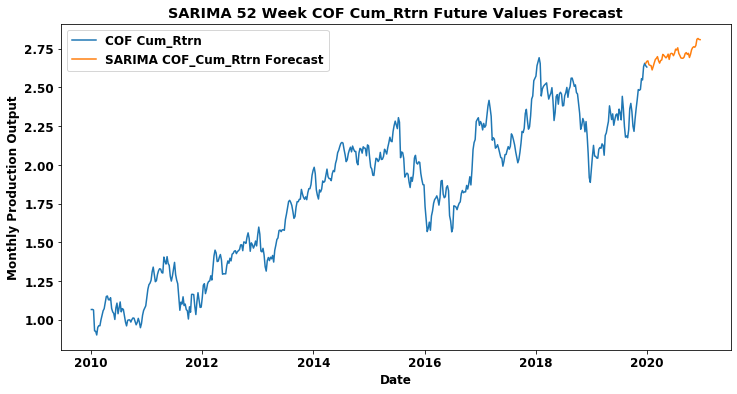

In [63]:
# SARIMA 52 Week COF Cum_Rtrn Future Values Forecast
SARIMA_Forecast=sarima_52week_ahead_forec.predict(start=520,end=571,dynamic=True)
plt.figure(figsize=(12,6))
plt.plot(data_cof['COF Cum_Rtrn'],label='COF Cum_Rtrn')
plt.plot(SARIMA_Forecast,label='SARIMA COF_Cum_Rtrn Forecast')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title(' SARIMA 52 Week COF Cum_Rtrn Future Values Forecast ',fontweight='bold')
plt.legend();

In [64]:
# First 5 SARIMA predictions
SARIMA_Forecast[:5]

2019-12-23    2.655934
2019-12-30    2.668310
2020-01-06    2.671778
2020-01-13    2.646923
2020-01-20    2.642770
Freq: W-MON, dtype: float64

## II) GRU

In [65]:
# Test size: 52 weeks
test_size = 52
test_index = len(data_cof)- test_size

In [66]:
# Dataset is split into training and test data
train = data_cof['COF Cum_Rtrn'].iloc[:test_index].values
test = data_cof['COF Cum_Rtrn'].iloc[test_index:].values

In [67]:
#train and test samples shape
print(train.shape,test.shape)

(470,) (52,)


In [68]:
# Reshaping the train and test samples
train=train.reshape((-1,1))
test=test.reshape((-1,1))
print(train.shape,test.shape)

(470, 1) (52, 1)


In [69]:
# Scaling the training and test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [70]:
# Importing the keras library and the TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [71]:
# Length can be considered as the number of entries that are to be used as inputs
# in order to determine/predict the next number in a sequence. 

# Number of features value is 1 as only one dataset feature is examined. The Date is not a feature as it comprises the index
# of the dataset (in Weekly Time steps)

# batch_size of value 4 has been selected, where at each batch 51 samples (corresponding to approximately a year of 
# weekly values) are to be trained so as to predict the next number in the sequence
length = 51
n_features=1
time_series_generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=4)

In [72]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU
from tensorflow.keras import initializers
import tensorflow as tf


# Use of the he_uniform initializer to set the initial random weights of the model layers. The bias initializer is set to a
# very small value (e.g. 0.01) to ensure that the neurons will fire at the beginning of the training process due to the use
# of a rectified linear unit as transfer (activation) function
initializer = tf.keras.initializers.he_uniform(seed=0)
# Initially, the network model is defined 
model = Sequential()

# Hidden layer neurons are chosen to be 13 (approximately 1/4 of the time series seq. length)
# Selected Activation function has been the rectified linear unit
model.add(GRU(13, activation='relu', input_shape=(length, n_features),kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The output layer consists of 1 neuron with a 'sigmoid' activation fuction 
model.add(Dense(1,activation='sigmoid',kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and
# second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

# A validation generator is constructed in a similar way to the previous time_series_generator with the only difference being
# the use of scaled_test values for validation purposes
time_series_val_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=4)

# Demonstration of EarlyStopping. GRU training stops if the required conditions are met (e.g not improvement of the
# loss value for 10 consecutive epochs)
from tensorflow.keras.callbacks import EarlyStopping
Early_Stopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

# The model is ready to be trained for a maximum of 50 epochs. The training process is monitored and at each epoch both 
# training and validation losses can be observed due to the presence of the time_series_val_generator
model.fit_generator(time_series_generator,epochs=50,
                    validation_data=time_series_val_generator ,
                   callbacks=[Early_Stopping])

Epoch 1/50
105/105 [==============================] - 6s 61ms/step - loss: 0.0563 - val_loss: 0.2051
Epoch 2/50
105/105 [==============================] - 4s 39ms/step - loss: 0.0488 - val_loss: 0.1621
Epoch 3/50
105/105 [==============================] - 4s 39ms/step - loss: 0.0443 - val_loss: 0.1372
Epoch 4/50
105/105 [==============================] - 4s 38ms/step - loss: 0.0398 - val_loss: 0.1054
Epoch 5/50
105/105 [==============================] - 4s 39ms/step - loss: 0.0351 - val_loss: 0.0781
Epoch 6/50
105/105 [==============================] - 4s 38ms/step - loss: 0.0293 - val_loss: 0.0628
Epoch 7/50
105/105 [==============================] - 4s 38ms/step - loss: 0.0218 - val_loss: 0.0372
Epoch 8/50
105/105 [==============================] - 4s 37ms/step - loss: 0.0127 - val_loss: 0.0168
Epoch 9/50
105/105 [==============================] - 4s 39ms/step - loss: 0.0053 - val_loss: 0.0152
Epoch 10/50
105/105 [==============================] - 4s 37ms/step - loss: 0.0033 - val_lo

Text(0, 0.5, "Loss-'MSE'")

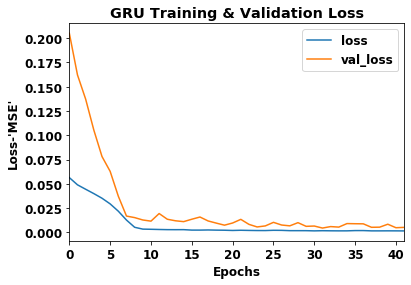

In [73]:
# Training and validation loss plots
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('GRU Training & Validation Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold')

In [74]:
# Determining all GRU Training values so as to compare them with the actual  dataset values used for the training process
training_outputs = []
batch = scaled_train[:length].reshape((1, length, n_features))

for i in range(len(scaled_train[length:])):
    train_out = model.predict(batch)[0]
    training_outputs.append(train_out) 
    batch = np.append(batch[:,1:,:],[[scaled_train[length:][i]]],axis=1)

In [75]:
# Creating a numpy array and applying the inverse_transform function to get the 419 actual training values. 
# 470 total training points - 51 the first batch sequence = 419
actual_train=scaled_train[length:]
actual_train=scaler.inverse_transform(actual_train)

In [76]:
# Applying the inverse_transform function to the training_outputs to get their mean weekly values
train_predictions=scaler.inverse_transform(training_outputs)

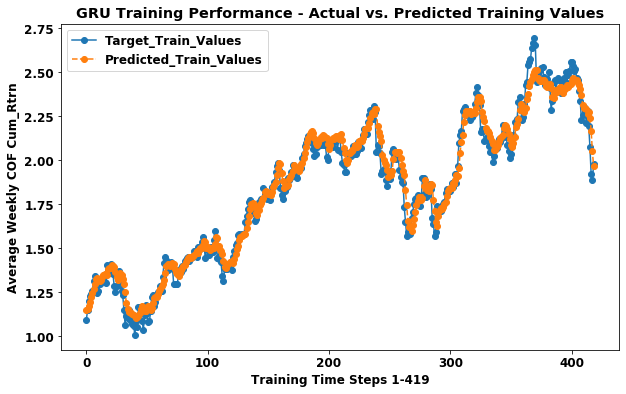

In [77]:
#'GRU Training Performance - Target vs. Predicted Training Values'
plt.figure(figsize=(10,6))
plt.plot(actual_train,marker='o',linestyle='-')

plt.plot(train_predictions,marker='o',linestyle='dashed')
plt.title('GRU Training Performance - Actual vs. Predicted Training Values',fontweight='bold')
plt.legend(('Target_Train_Values','Predicted_Train_Values'))
plt.xlabel('Training Time Steps 1-419',fontweight='bold')
plt.ylabel('Average Weekly COF Cum_Rtrn',fontweight='bold');


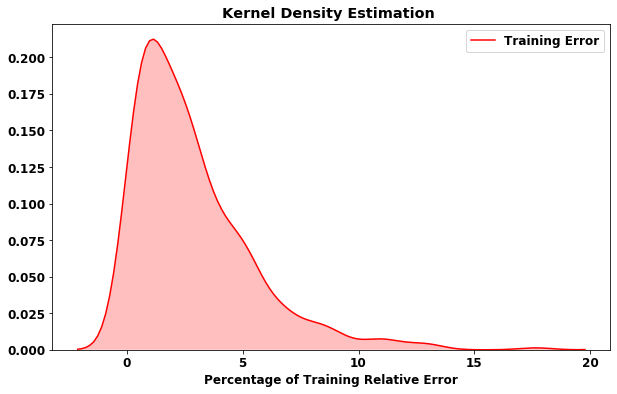

In [78]:
# Training relative Error Percentage distribution plot
train_err=abs((actual_train-train_predictions)/actual_train)*100
train_err=pd.DataFrame(train_err,columns=['Training Error'])
plt.figure(figsize=(10,6))
sns.kdeplot(train_err['Training Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('Percentage of Training Relative Error',fontweight='bold')
plt.title('Kernel Density Estimation ',fontweight='bold');


In [79]:
# Summary statistics of training relative error

train_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Error,419.0,2.857464,2.56364,0.018177,0.96147,2.183575,4.002296,17.634469


In [80]:
# Determining all GRU predicted values so as to compare them with the target test values 
test_outputs = []
batch = scaled_train[-length:].reshape((1, length, n_features))

for i in range(len(test)):
    test_out = model.predict(batch)[0]
    test_outputs.append(test_out) 
    batch = np.append(batch[:,1:,:],[[test_out]],axis=1)


In [81]:
# Applying the inverse_transform function to the test_outputs to get their mean weekly values
gru_predictions = scaler.inverse_transform(test_outputs)

In [82]:
gru_predictions

array([[1.96960503],
       [1.96658877],
       [1.96566507],
       [1.96519757],
       [1.9636736 ],
       [1.96272484],
       [1.96253098],
       [1.96327286],
       [1.96505883],
       [1.96781575],
       [1.97098375],
       [1.97468794],
       [1.97952131],
       [1.98554423],
       [1.99261157],
       [1.99963443],
       [2.00637215],
       [2.01368561],
       [2.0220968 ],
       [2.03122097],
       [2.04070195],
       [2.05117808],
       [2.06227228],
       [2.07359651],
       [2.08472409],
       [2.09593826],
       [2.10751063],
       [2.11923837],
       [2.13104428],
       [2.14251524],
       [2.1541019 ],
       [2.16581993],
       [2.17782184],
       [2.18982588],
       [2.20164043],
       [2.21317196],
       [2.22442473],
       [2.23514965],
       [2.24531194],
       [2.25472841],
       [2.26337068],
       [2.2712329 ],
       [2.27849357],
       [2.28523363],
       [2.29142899],
       [2.29707878],
       [2.30229307],
       [2.306

In [83]:
test=pd.DataFrame(data_cof['COF Cum_Rtrn'].iloc[test_index:])

In [84]:
test.head()

,COF Cum_Rtrn
Dates,
2019-01-07,2.056133
2019-01-14,2.126300
2019-01-21,2.057618
2019-01-28,2.055775
2019-02-04,2.044814


In [85]:
# A new test feature is created to comprise the GRU test predictions
test['GRU Predictions'] = gru_predictions

In [86]:
# test(Target) and GRU Predictions
test

,COF Cum_Rtrn,GRU Predictions
Dates,,
2019-01-07,2.056133,1.969605
2019-01-14,2.126300,1.966589
2019-01-21,2.057618,1.965665
2019-01-28,2.055775,1.965198
2019-02-04,2.044814,1.963674
2019-02-11,2.043534,1.962725
2019-02-18,2.101088,1.962531
2019-02-25,2.112266,1.963273
2019-03-04,2.107247,1.965059


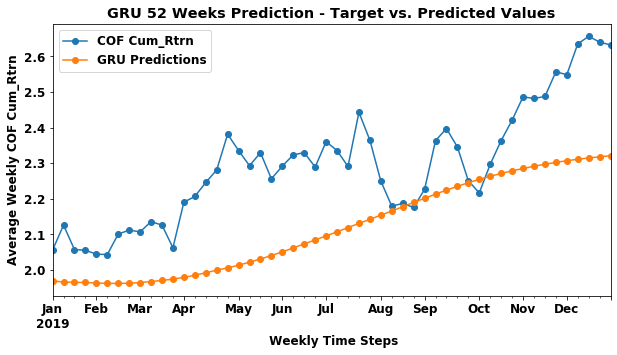

In [87]:
# Plot of the Test vs. Predicted results for a prediction horizon of one year (52 weeks)
test.plot(figsize=(10,5),marker='o',linestyle='-');
plt.title('GRU 52 Weeks Prediction - Target vs. Predicted Values',fontweight='bold')
plt.ylabel('Average Weekly COF Cum_Rtrn',fontweight='bold')
plt.xlabel(' Weekly Time Steps',fontweight='bold');

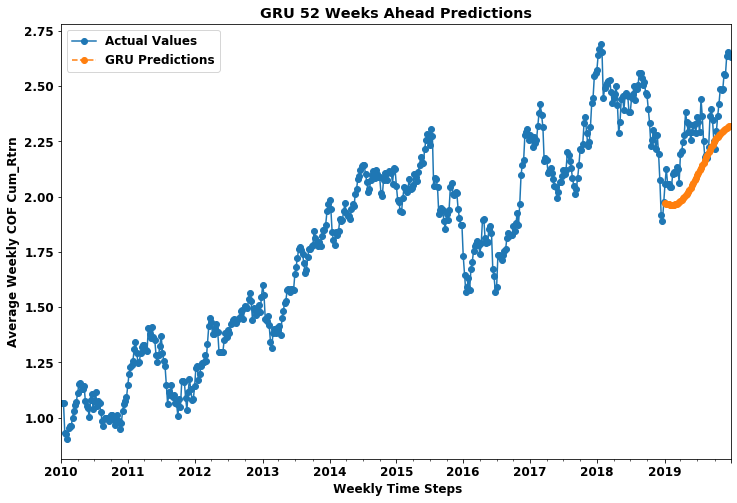

In [88]:
# Plot comprising all COF Cum_Rtrn data samples, the GRU model's training outputs and the GRU test predictions

ax=data_cof['COF Cum_Rtrn'].plot(figsize=(12,8),marker='o',linestyle='-')


test['GRU Predictions'].plot(ax=ax,legend=True,marker='o',linestyle='dashed')
plt.title('GRU 52 Weeks Ahead Predictions',fontweight='bold')
plt.legend(('Actual Values','GRU Predictions'))
plt.ylabel('Average Weekly COF Cum_Rtrn',fontweight='bold')
plt.xlabel(' Weekly Time Steps',fontweight='bold');





In [89]:
# Importing the metrics
from sklearn.metrics import mean_squared_error

In [90]:
# Root Mean Squared Error
print(np.sqrt(mean_squared_error(test['COF Cum_Rtrn'],test['GRU Predictions'])))

0.2042792051558553


In [91]:
# The last 'COF Cum_Rtrn' value of the dataset has date index value equal to 2019-12-30
data_cof['COF Cum_Rtrn'].tail(3)

Dates
2019-12-16    2.656082
2019-12-23    2.639949
2019-12-30    2.631882
Freq: W-MON, Name: COF Cum_Rtrn, dtype: float64

In [92]:
# A new scaler is being initialized
data_scaler=MinMaxScaler()

In [93]:
# fit_transform function applied to all dataset's entries as the model is to be trained to forecast into the 'uknown' future
scaled_set=data_scaler.fit_transform(data_cof['COF Cum_Rtrn'].values.reshape(-1,1))

In [94]:
# A new TimeseriesGenerator is created to include the new scaled values, with batch_size = 4 of length=52
length=52
data_generator=TimeseriesGenerator(scaled_set,scaled_set,length=length,batch_size=4)

In [95]:
# The GRU model is being constructed and compiled for the training process to take place
# Since the model forecasts into the future, in this case there are no validation data and no use of 
# keras callbacks ('EarlyStopping')

initializer = tf.keras.initializers.he_uniform(seed=0)
model=Sequential()
model.add(GRU(13, activation='relu', input_shape=(length, n_features),kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The output layer consists of 1 neuron with a 'sigmoid' activation fuction 
model.add(Dense(1,activation='sigmoid',kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and
# second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

model.fit_generator(data_generator,epochs=50)

Epoch 1/50
118/118 [==============================] - 7s 61ms/step - loss: 0.0570
Epoch 2/50
118/118 [==============================] - 5s 42ms/step - loss: 0.0467: 1s
Epoch 3/50
118/118 [==============================] - 5s 42ms/step - loss: 0.0417
Epoch 4/50
118/118 [==============================] - 5s 41ms/step - loss: 0.0374
Epoch 5/50
118/118 [==============================] - 5s 44ms/step - loss: 0.0326
Epoch 6/50
118/118 [==============================] - 4s 38ms/step - loss: 0.0270
Epoch 7/50
118/118 [==============================] - 5s 38ms/step - loss: 0.0210
Epoch 8/50
118/118 [==============================] - 4s 38ms/step - loss: 0.0163
Epoch 9/50
118/118 [==============================] - 4s 38ms/step - loss: 0.0137
Epoch 10/50
118/118 [==============================] - 5s 38ms/step - loss: 0.0118
Epoch 11/50
118/118 [==============================] - 5s 40ms/step - loss: 0.0102: 0s - l
Epoch 12/50
118/118 [==============================] - 5s 38ms/step - loss: 0.0091
E

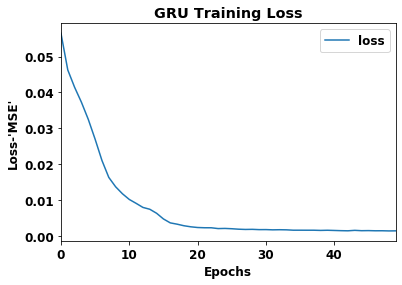

In [96]:
# Training Performance
loss=pd.DataFrame(model.history.history)
loss.plot()
plt.title('GRU Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

In [97]:
# Determining all GRU Training values so as to compare them with the target values used for the training process
full_training_outputs = []
batch = scaled_set[:length].reshape((1, length, n_features))

for i in range(len(scaled_set[length:])):
    full_train_out = model.predict(batch)[0]
    full_training_outputs.append(full_train_out) 
    batch = np.append(batch[:,1:,:],[[scaled_set[length:][i]]],axis=1)

In [98]:
# Creating a numpy array and applying the inverse_transform function to get the 470 actual training values. 
# 522 total training points - 52 the first batch sequence = 470
f_train=scaled_set[length:]
f_train=scaler.inverse_transform(f_train)

In [99]:
# Applying the inverse_transform function to the training_outputs to get their mean weekly values
f_train_predictions=scaler.inverse_transform(full_training_outputs)

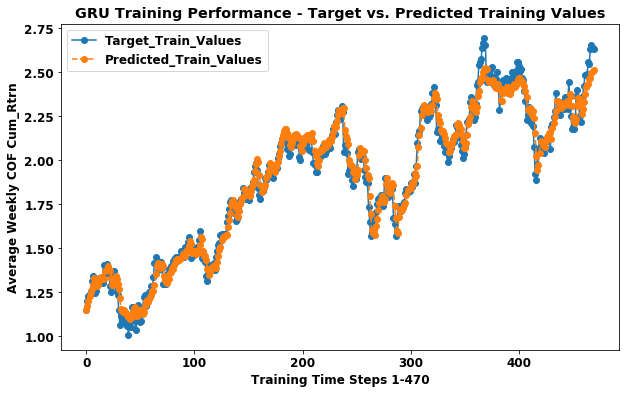

In [100]:
#'GRU Training Performance -Target vs. Predicted Training Values'
plt.figure(figsize=(10,6))
plt.plot(f_train,marker='o',linestyle='-')

plt.plot(f_train_predictions,marker='o',linestyle='dashed')
plt.title('GRU Training Performance - Target vs. Predicted Training Values',fontweight='bold')
plt.legend(('Target_Train_Values','Predicted_Train_Values'))
plt.xlabel('Training Time Steps 1-470',fontweight='bold')
plt.ylabel('Average Weekly COF Cum_Rtrn',fontweight='bold');


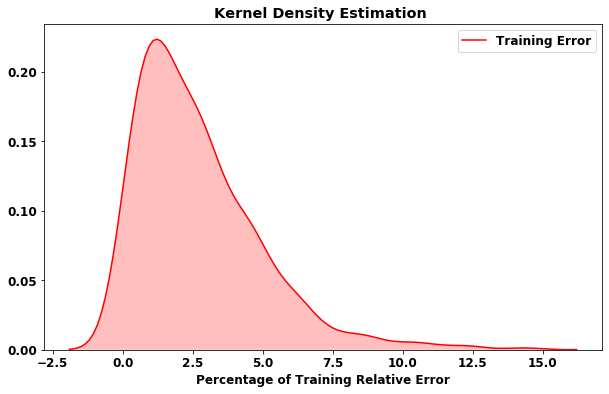

In [101]:
# Training Relative Error Percentage distribution plot
f_train_err=abs((f_train-f_train_predictions)/f_train)*100
f_train_err=pd.DataFrame(f_train_err,columns=['Training Error'])
plt.figure(figsize=(10,6))
sns.kdeplot(f_train_err['Training Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('Percentage of Training Relative Error',fontweight='bold')
plt.title('Kernel Density Estimation ',fontweight='bold');

In [102]:
# Summary statistics of training_error. 
f_train_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Error,470.0,2.713664,2.22085,0.001011,1.077091,2.22307,3.843414,14.309202


In [103]:
# Determining all GRU forecasted values 
gru_outputs=[]
batch = scaled_set[-length:].reshape((1, length, n_features))

for i in range(length):
    gru_out = model.predict(batch)[0]
    gru_outputs.append(gru_out) 
    batch = np.append(batch[:,1:,:],[[gru_out]],axis=1)

In [104]:
# Applying the inverse_transform function to get the mean weekly 'COF Cum_Rtrn' representations 
gru_outputs=data_scaler.inverse_transform(gru_outputs)
gru_outputs

array([[2.50906259],
       [2.47271093],
       [2.44420741],
       [2.4219611 ],
       [2.40461299],
       [2.3910242 ],
       [2.38031347],
       [2.37181942],
       [2.3650254 ],
       [2.35954452],
       [2.35508363],
       [2.35139897],
       [2.3483248 ],
       [2.34578031],
       [2.34365192],
       [2.34187703],
       [2.3404275 ],
       [2.33929799],
       [2.33836256],
       [2.33757792],
       [2.33694342],
       [2.33638805],
       [2.33594241],
       [2.33559765],
       [2.33533575],
       [2.33510583],
       [2.33495078],
       [2.33483071],
       [2.33476107],
       [2.33486227],
       [2.33494172],
       [2.33494353],
       [2.33486526],
       [2.3347294 ],
       [2.33454556],
       [2.33436502],
       [2.33426851],
       [2.33421604],
       [2.33411047],
       [2.33389677],
       [2.33359317],
       [2.33323945],
       [2.33286419],
       [2.33249384],
       [2.33215078],
       [2.33177915],
       [2.33139397],
       [2.331

In [105]:
# Index of forecasted mean weekly values
gru_forecast_index=pd.date_range(start='2020-01-01 00:00:00',periods=52,freq='W')

In [106]:
# Converting the gru_outputs from np.ndarray to pandas dataframe
gru_forecast_df=pd.DataFrame(data=gru_outputs,index=gru_forecast_index,columns=['GRU Forecasts'])
gru_forecast_df

,GRU Forecasts
2020-01-05,2.509063
2020-01-12,2.472711
2020-01-19,2.444207
2020-01-26,2.421961
2020-02-02,2.404613
2020-02-09,2.391024
2020-02-16,2.380313
2020-02-23,2.371819
2020-03-01,2.365025
2020-03-08,2.359545


Text(0.5, 0, ' Weekly Time Steps')

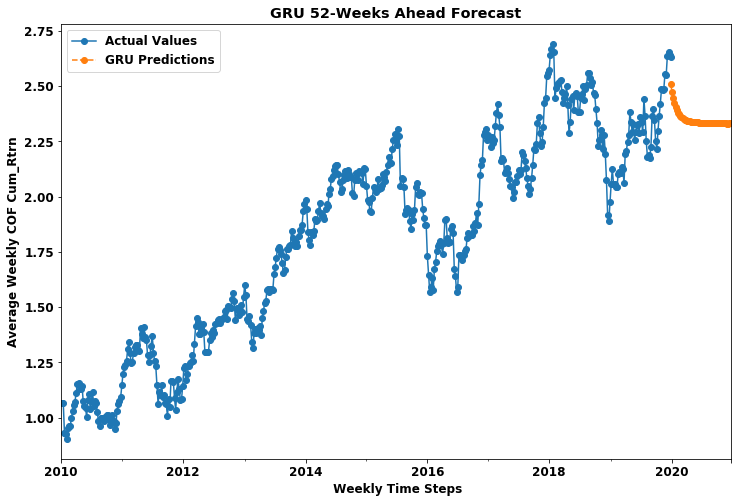

In [107]:
# Plot comprising all actual mean weekly 'COF Cum_Rtrn' data,and the 52-Weeks GRU forecasted values.

ax=data_cof['COF Cum_Rtrn'].plot(figsize=(12,8),marker='o',linestyle='-')
gru_forecast_df.plot(ax=ax,marker='o',linestyle='--')
plt.title('GRU 52-Weeks Ahead Forecast',fontweight='bold')
plt.legend(('Actual Values','GRU Predictions'))
plt.ylabel('Average Weekly COF Cum_Rtrn',fontweight='bold')
plt.xlabel(' Weekly Time Steps',fontweight='bold')
